# Clustering

- What is clustering? Identifying groups in our data.
- Why might we do clustering?
    - Exploration
    - Labeling
    - Features for Supervised Learning
- KMeans Algorithm
    1. Start with `k` random points
    1. Assign every observation to the closest centroids.
    1. Recalculate centroids
    1. Repeat

## Example 1: Mall Customers

### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import wrangle_mall

In [2]:
customers = wrangle_mall.acquire()
train, validate, test = wrangle_mall.split(customers)
train_scaled, _, _ = wrangle_mall.scale(train, validate, test)

Train: 136 rows, 5 cols
Validate: 34 rows, 5 cols
Test: 30 rows, 5 cols


### Cluster

1. choose features to cluster on
1. choose k
1. create and fit the model

In [3]:
cols = ['spending_score', 'annual_income']
X = train_scaled[cols]
kmeans = KMeans(n_clusters=5).fit(X)

1. Look at the model's output
1. interpretation
1. visualize

In [4]:
# NB. clusters were created on scaled data, but can be used to analyze unscaled
train['cluster'] = kmeans.predict(X)
train.cluster = train.cluster.astype('category')

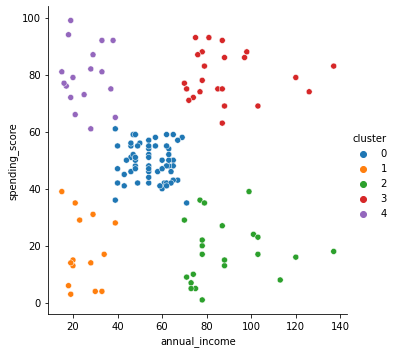

In [5]:
sns.relplot(data=train, y='spending_score', x='annual_income', hue='cluster')

In [6]:
train.groupby('cluster').mean()

,customer_id,age,annual_income,spending_score
cluster,,,,
0,84.650000,42.483333,54.633333,49.466667
1,20.857143,47.500000,24.857143,18.000000
2,163.000000,40.909091,88.318182,18.000000
3,164.782609,32.173913,88.434783,79.565217
4,22.470588,24.764706,25.588235,79.529412


### How do we choose a value for k?

It's a judgement call

- domain knowledge
- educated guesses
- the elbow method
    - **inertia**: sum of squared distance from each point to its centroid

Elbow Method Demo

1. Choose a range of k values
1. Create a model for each k and record **inertia**
1. Visualize results (k vs inertia)

<AxesSubplot:xlabel='k', ylabel='Inertia'>

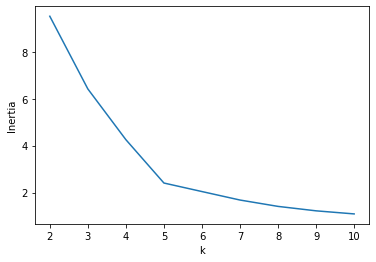

In [7]:
cols = ['spending_score', 'annual_income']
X = train_scaled[cols]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia')

## Example 2: Insurance Data

### Setup

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('https://gist.githubusercontent.com/zgulde/ad9305acb30b00f768d4541a41f5ba19/raw/01f4ac8f158e68b0d293ff726c0c1dd08cdd501d/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [12]:
# data split
train_and_validate, test = train_test_split(df, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

# scale
scaler = MinMaxScaler()
cols = ['age', 'bmi', 'children', 'charges']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

### Cluster

1. Choose a k
1. Create the model and produce clusters
1. Interpret results

In [16]:
X = train_scaled[cols]
kmeans = KMeans(n_clusters=4).fit(X)
train['cluster'] = kmeans.predict(X)

train.groupby('cluster').mean()

,age,sex,bmi,children,smoker,region,charges
cluster,,,,,,,
0,52.482759,0.494253,31.040000,0.482759,0.103448,1.402299,12201.385798
1,24.352941,0.494118,28.480824,0.517647,0.117647,1.541176,5158.995932
2,40.309524,0.690476,34.646429,1.119048,0.976190,1.642857,40608.011739
3,40.000000,0.477612,31.063582,2.731343,0.104478,1.477612,11533.444823
